In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def return_function(df):
    if type(df)!=pd.DataFrame:
        df = pd.DataFrame(df)
    out_df = (df.shift(-1)-df)/df
    return out_df

In [4]:
data = pd.read_csv("financial_sector_clean_return_space.csv")
data.index = pd.DatetimeIndex(data.iloc[:,[0]].values.flatten())
data = data.iloc[:,1:]

In [5]:
sp500 = pd.read_csv('/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/SPX500.csv')
sp500.index = pd.DatetimeIndex(sp500.iloc[:,[0]].values.flatten())
sp500 = sp500.iloc[:,[1]]
sp500 = return_function(sp500)

In [6]:
sector_return = data.iloc[:,[0]]
x_data = pd.concat([data.iloc[:,1:],sp500],1)
sector_return,x_data = model_data(sector_return,x_data)

In [8]:
x = x_data
y = sector_return
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.814935878103


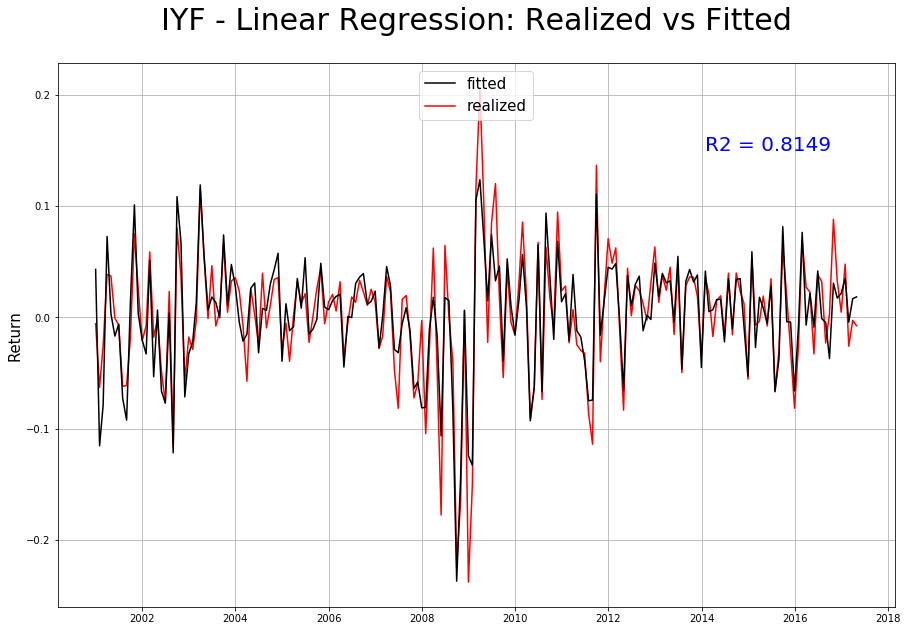

In [10]:
plt.figure(figsize = (15,10))
ttl = plt.title("IYF - Linear Regression: Realized vs Fitted",size = 30)
ttl.set_position([.5, 1.05])
real,=plt.plot(y,'r-')
fit,=plt.plot(y_predict,'k-')
plt.text(y.index[-40],0.15,'R2 = '+str(round(metric_value,4)),size=20,color='b')
plt.legend([fit,real],['fitted','realized'],loc=9,fontsize=15)
plt.ylabel("Return",size=15)
plt.grid()
plt.savefig('foo.png',bbox_inches='tight')
plt.show()


In [12]:
econ_data = pd.read_csv("fin_clean_only_econ.csv")
econ_data.index = pd.DatetimeIndex(econ_data.iloc[:,[0]].values.flatten())
econ_data = econ_data.iloc[:,1:]
econ_data.head()

,IYF US Equity,GDP,DGS10,TEDRATE,YIELD_SLOPE,PAYEMS,VIXCLS,CSUSHPINSA,RECPROUSM156N,UNRATE,FEDFUNDS,PCE,BAMLH0A0HYM2,NETEXP,UMCSENT,XAU Curncy,XOI Index
2000-10-31,-0.049229,0.011088,0.0577,0.0057,-0.00163,0.001723,0.148760,0.005507,0.0268,0.039,0.0651,0.000940,0.000779,2.117121,0.017013,0.019989,-0.026538
2000-11-30,0.075734,0.011088,0.0548,0.0068,-0.00145,0.001071,0.254761,0.005198,0.0440,0.039,0.0651,0.002153,0.000906,2.117121,-0.085502,0.006656,0.061671
2000-12-31,-0.005747,0.011088,0.0512,0.0067,0.00016,-0.000188,-0.094435,0.004617,0.0806,0.039,0.0640,0.006432,0.000916,2.117121,-0.037602,-0.023508,-0.015422
2001-01-31,-0.063006,0.003422,0.0519,0.0056,0.00542,0.000543,-0.179888,0.003953,0.1576,0.042,0.0598,0.004399,0.000787,-1.247103,-0.043295,0.004890,-0.004905
2001-02-28,-0.025293,0.003422,0.0492,0.0032,0.00506,-0.000203,0.287466,0.003845,0.1868,0.042,0.0549,0.002782,0.000770,-1.247103,0.009934,-0.034438,0.007709


In [13]:
sector_return = econ_data.iloc[:,[0]]
econ_x_data = pd.concat([econ_data.iloc[:,1:],sp500],1)
sector_return,econ_x_data = model_data(sector_return,x_data)

In [14]:
x = econ_x_data
y = sector_return
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.814935878103


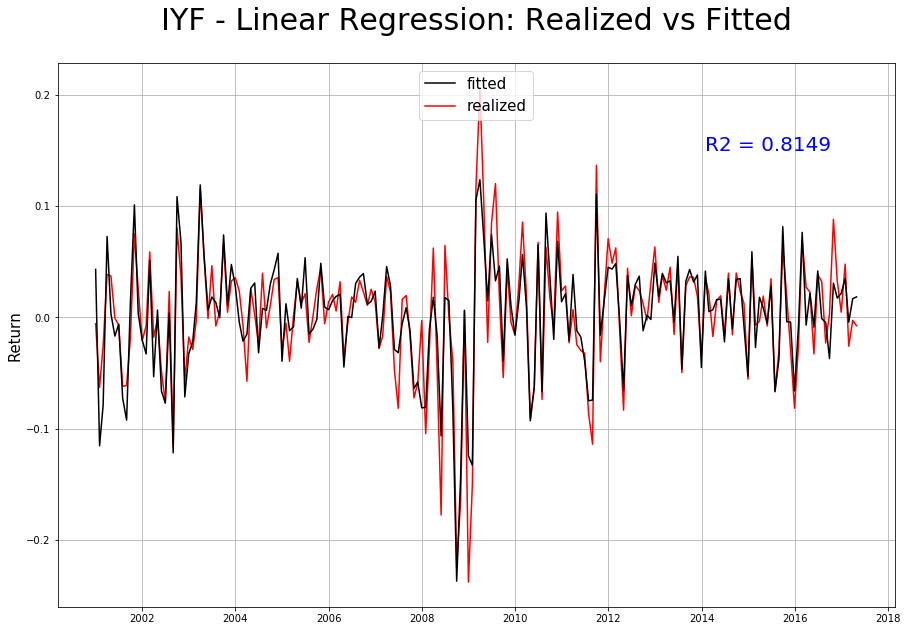

In [15]:
plt.figure(figsize = (15,10))
ttl = plt.title("IYF - Linear Regression: Realized vs Fitted",size = 30)
ttl.set_position([.5, 1.05])
real,=plt.plot(y,'r-')
fit,=plt.plot(y_predict,'k-')
plt.text(y.index[-40],0.15,'R2 = '+str(round(metric_value,4)),size=20,color='b')
plt.legend([fit,real],['fitted','realized'],loc=9,fontsize=15)
plt.ylabel("Return",size=15)
plt.grid()
plt.savefig('foo2.png',bbox_inches='tight')
plt.show()
